# Titanic

This is a solution to the extremely popular puzzle/problem on predicting survival rate for passengers on Titanic Ship. We will first clean the data and make it suitable for analysis while discussing about which characteristics make sense to be used in our algorithm. So, Let's begin:


In [376]:
#Importing important modules to be used in the problem
import pandas as pd #For dealing with .csv files or tables using dataframes
import numpy as np #For dealing with arrays and a way lot more things ;)
import random #Because ofcourse, there is entropy in the world

import seaborn as sns #For visualization - Well you will find out

import matplotlib.pyplot as plt #Because we will plot - alot

%matplotlib inline
#We want everything inline as we plot things - You will see

#Now comes the machine learning

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier






The above completes the procedure to import different libraries. We are using sklearn libraries to work with different approaches. All of the import(s) such as LogisticRegression, SVC etc. are models used in data science having different mathematical and geometrical representation. The reader is advised to have some idea about each before proceeding ahead in order to get better idea of what is happening.

## Dataset
Let us now have a loot at the dataset which consists of two parts:
1. Training Data which as the name suggests is going to be used to train our model.
2. Test Data is over which we will evaluate our model. It means whether our model is making correct predictions or not.

In [377]:
train_csv = pd.read_csv('/home/hrituraj/Downloads/train.csv')
test_csv = pd.read_csv('/home/hrituraj/Downloads/test.csv')
#Let us just put them together. Does not really matter though. You could just leave it like that
combine = [train_csv, test_csv]

### Analysis Begins
Let us begin our simple analysis of dataset. Let us see what we know about each passenger

In [378]:
print(train_csv.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


Fine. So what we know is: Each passenger's ID, whether he survived or not, what was his passenger class, what was his name, what was his/her gender, his age, how many of his Siblings/Spouses were on board, how many of his Parents/Children were onboard, what was the ticket number, how much was the ticket fare, the cabin where the passenger was travelling and from where/which gate did the passenger enter to embark on the journey.

Let us peep some more:

In [379]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Ahan! Here is a problem which is very common to experience while dealing with data. Some values are not there. There could be several problems assigning them some values. Some women preferred to keep their age secret, some very poor people did not even know their ages etc. 

What that means is we need to clean that data. Now there could be multiple ways of dealing with it. Let us look at the columns which are not complete:

#### Age :
We could drop anything but age. Even those who have seen the movie remember how crucial your age was to decide whether you will survive or not. Hence, instead of dropping it, we will look at some other things (in the following code) to compensate for it.

#### Cabin :
Now this catches our eyeballs. It is mostly empty. And it does not seem very relevant to our data anyway. We will however look at the correlation too but I am already guessing we will be better off by just dropping this feature.

#### Embarked:
Well, just two values are empty. We could just fill them and go ahead. 

In [380]:
train_csv.describe(include = ['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Graham, Mr. George Edward",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


As is visible from the above analysis, Ticket ids are mostly duplicate and may not contributing anything towards survival anyway. Cabin number as we discussed above is highly empty and can be dropped comfortable for our analysis. Name is mostly irrelavant but some things can still be extracted from it. Rich people usually have names like Master or Queen and chances are they might have survived more than poor people. So, we will include it into our list. 

In [381]:
train_csv[['Pclass', 'Survived']].groupby('Pclass').mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


If it was not obvious  anyway, we can now clearly see, as the standard of passenger class decreased, the chances of survival decreased.

In [382]:
train_csv[['Sex', 'Survived']].groupby('Sex').mean()

,Survived
Sex,
female,0.742038
male,0.188908


Well, obviously!

In [383]:
train_csv[['SibSp','Survived']].groupby('SibSp').mean().sort_values(by='Survived', ascending = False)

,Survived
SibSp,
1,0.535885
2,0.464286
0,0.345395
3,0.250000
4,0.166667
5,0.000000
8,0.000000


The above does not seem to be very helpful. Hmm, may be can combine both SibSp and ParCh to get some idea? Let us deal with just Parch first:

In [384]:
train_csv[['Parch','Survived']].groupby('Parch').mean().sort_values(by='Survived', ascending = False)

,Survived
Parch,
3,0.600000
1,0.550847
2,0.500000
0,0.343658
5,0.200000
4,0.000000
6,0.000000


Ahh! Confusing again. Let us form a new column, 'Family'!

In [385]:
train_csv['Family'] = train_csv['SibSp'] + train_csv['Parch']
test_csv['Family'] = test_csv['SibSp'] + test_csv['Parch']
#train_csv[['Family','Survived']].groupby('Family').mean().sort_values(by='Survived', ascending = False)

Bleh! Does not seem to be helping. We will drop them both. Why complicate shit!

Before that let us do some more corelations finding.

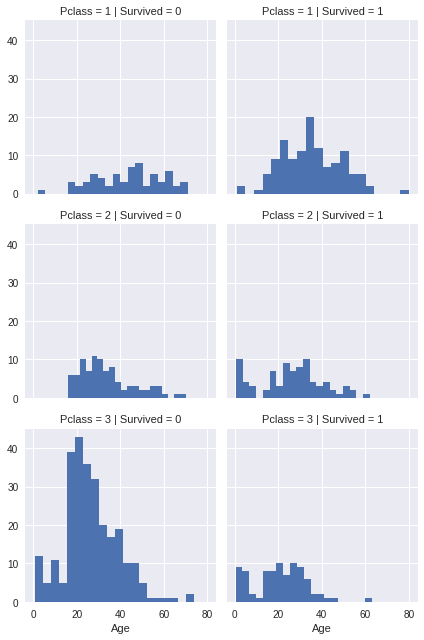

In [386]:
helping_hand = sns.FacetGrid(train_csv,row = 'Pclass', col = 'Survived')
helping_hand.map(plt.hist, 'Age', bins = 20)

The above visualization clearly makes some good sense for us. Passengers in Class 1 had higher rate of survival. Also, Children of class 1 and class 2 mostly survived! It means these two features are instrumental in making decision.

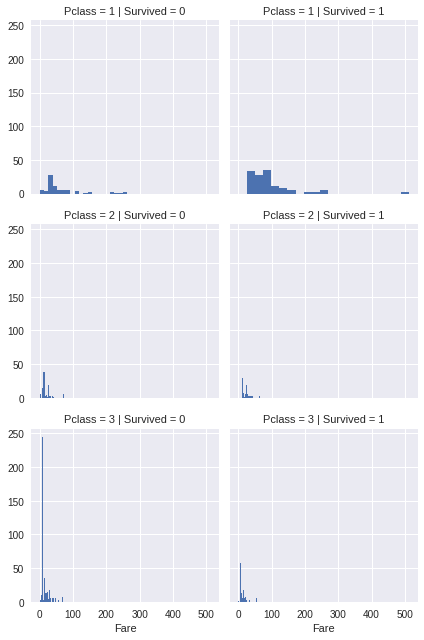

In [387]:
helping_hand = sns.FacetGrid(train_csv,row = 'Pclass', col = 'Survived')
helping_hand.map(plt.hist, 'Fare', bins = 20)

Clearly, the people will higher fare got better passenger class (or those who were rich and famous people purchased better tickets) and hence had higher rate of survival. 

Well, Well, Well! We have done pretty good analysis. So, we will now make decisions. What to keep, what not to keep. And how to keep what to keep.


As was decided, we first drop off cabin and Ticket number.

In [388]:
train_csv = train_csv.drop(['Ticket', 'Cabin'], axis=1)
test_csv = test_csv.drop(['Ticket', 'Cabin'], axis=1)
combine = [train_csv, test_csv]

Now, there are some things to notice. Age clearly has relation to the survival rate. The problem however is how to 'numericalize' the data. A suggestion is to convert age section into 'bands' or 'groups'. We will then convert it into categories.

Before we do that, let 

In [389]:
for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

combine[0]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q,0,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,0,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,4,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,2,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,1,Mrs


In [390]:
pd.crosstab(train_csv['Title'], train_csv['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


Clearly, there are some categories which are quite frequent while others are very rare. Since we want to convert Title into categories, it is better if we group those rare ones into just one category - 'rare'

In [391]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col',\
 	'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')

In [392]:
pd.crosstab(train_csv['Title'], train_csv['Sex'])

Sex,female,male
Title,,
Master,0,40
Miss,182,0
Mlle,2,0
Mme,1,0
Mr,0,517
Mrs,125,0
Ms,1,0
Rare,3,20


Umm, there are some typos may be. Making some guesses - such as  'Miss' for 'Ms' and 'Mrs' for 'Mme'

In [393]:
for dataset in combine:    
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [394]:
pd.crosstab(train_csv['Title'], train_csv['Sex'])

Sex,female,male
Title,,
Master,0,40
Miss,185,0
Mr,0,517
Mrs,126,0
Rare,3,20


Awesome!

But hey, we can not just deal with texts while doing 'Data Science' on these things, let us therefore wrangle our data and convert this strings by relating them to some categories. But before that let us see if the 'Title' variable even helps in finding the survival rate.

In [395]:
train_csv[['Title', 'Survived']].groupby(['Title'], as_index=False).mean().sort_values('Survived',ascending = False)
train_csv

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,Mr
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,8.4583,Q,0,Mr
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,51.8625,S,0,Mr
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,21.0750,S,4,Master
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,11.1333,S,2,Mrs
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,30.0708,C,1,Mrs


Yes, it does.

Let us now map our strings to numbers as promised. 

In [396]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [397]:
train_csv.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,0,1


Nice!

Now let us drop some more things which won't make sense from here on. We have already extracted useful information from Names and passengerIDs do not obviously help us in making decision. So, let us get rid of them


In [398]:
train_csv = train_csv.drop(['Name', 'PassengerId'], axis=1)
test_csv = test_csv.drop(['Name'], axis=1)
combine = [train_csv, test_csv]
train_csv.shape, test_csv.shape

((891, 10), (418, 10))

We don't drop PassengerIDs from test data for obvious reasons.

Let us now map male and female categories to numerical value.


In [399]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map( {'female': 1, 'male': 0} ).astype(int)


In [400]:
train_csv.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Family,Title
0,0,3,0,22.0,1,0,7.2500,S,1,1
1,1,1,1,38.0,1,0,71.2833,C,1,3
2,1,3,1,26.0,0,0,7.9250,S,0,2
3,1,1,1,35.0,1,0,53.1000,S,1,3
4,0,3,0,35.0,0,0,8.0500,S,0,1


As, we had discussed let us convert ages into brackets or groups and then into categories. But before we do that, we need to fill up the non-filled Age values. Well, we take the following approach here:

1. We first find out the median age of the passengers of a particular gender and particular class.
2. It is likedly that the the age which is not known will be somewhere around it for a passenger of same gender and same passenger class.

In [401]:
guess_ages = np.zeros((2,3))
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()
            age_guess = guess_df.median()
            guess_ages[i,j] = int( age_guess/0.5 + 0.5 ) * 0.5
            



In [402]:
guess_ages
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
Family      891 non-null int64
Title       891 non-null int64
dtypes: float64(2), int64(7), object(1)
memory usage: 69.7+ KB


In [403]:
for dataset in combine:
    for i in range(0, 2):
        for j in range(0, 3):
            dataset['Age'].fillna(0, inplace = True)
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]
            dataset['Age'] = dataset['Age'].astype(int)


In [404]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null int64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
Family      891 non-null int64
Title       891 non-null int64
dtypes: float64(1), int64(8), object(1)
memory usage: 69.7+ KB


Let us now convert ages into groups. We will make five groups and replace each group with its ordinal.

Let us first find out the groups.

In [405]:
train_csv['AgeBand'] = pd.cut(train_csv['Age'], 5)
train_csv[['AgeBand','Survived']].groupby('AgeBand').mean().sort_values(by='Survived', ascending = False)

,Survived
AgeBand,
"(48, 64]",0.434783
"(32, 48]",0.403226
"(-0.08, 16]",0.386282
"(16, 32]",0.370690
"(64, 80]",0.090909


So, we have five categories as seen above. Let us divide into groups:


In [406]:
for dataset in combine:    
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 64, 'Age']


We will do something similar for fare

In [407]:
test_csv['Fare'].fillna(test_csv['Fare'].dropna().median(), inplace=True)

train_csv['Fare'].fillna(train_csv['Fare'].dropna().median(), inplace=True)
train_csv['FareBand'] = pd.cut(train_csv['Fare'], 4)
train_csv[['FareBand','Survived']].groupby('FareBand').mean().sort_values(by='Survived', ascending = False)

,Survived
FareBand,
"(384.247, 512.329]",1.000000
"(128.0823, 256.165]",0.724138
"(256.165, 384.247]",0.666667
"(-0.512, 128.0823]",0.368113


As we had talked about how many family members were on board, let us convert that feature into whether the person was alone on the ship or not.

In [408]:
for dataset in combine:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['Family'] == 1, 'IsAlone'] = 1

In [409]:
train_csv[['IsAlone','Survived']].groupby('IsAlone').mean()

,Survived
IsAlone,
0,0.346575
1,0.552795


Seems like a relevant feature. Let us keep it and drop 'Family', 'SibSp' and 'Parch'

In [410]:
train_csv = train_csv.drop(['Parch', 'SibSp', 'Family'], axis=1)
test_csv = test_csv.drop(['Parch', 'SibSp', 'Family'], axis=1)
combine = [train_csv, test_csv]

train_csv.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,AgeBand,FareBand,IsAlone
0,0,3,0,1,7.2500,S,1,"(16, 32]","(-0.512, 128.0823]",1
1,1,1,1,2,71.2833,C,3,"(32, 48]","(-0.512, 128.0823]",1
2,1,3,1,1,7.9250,S,2,"(16, 32]","(-0.512, 128.0823]",0
3,1,1,1,2,53.1000,S,3,"(32, 48]","(-0.512, 128.0823]",1
4,0,3,0,2,8.0500,S,1,"(32, 48]","(-0.512, 128.0823]",0


Oops! We forgot to convert our Farebands into ordinal numbers, let us do that first:

In [411]:
for dataset in combine:
    dataset.loc[ dataset['Fare'] <= 128.0823, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 128.0823) & (dataset['Fare'] <= 256.165), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 256.165) & (dataset['Fare'] <= 384.247), 'Fare']   = 2
    dataset.loc[ dataset['Fare'] > 384.247, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

train_csv = train_csv.drop(['FareBand'], axis=1)
train_csv = train_csv.drop(['AgeBand'], axis = 1)
combine = [train_csv, test_csv]
    


In [412]:
train_csv.head(10)

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,0,S,1,1
1,1,1,1,2,0,C,3,1
2,1,3,1,1,0,S,2,0
3,1,1,1,2,0,S,3,1
4,0,3,0,2,0,S,1,0
5,0,3,0,0,0,Q,1,0
6,0,1,0,3,0,S,1,0
7,0,3,0,0,0,S,4,0
8,1,3,1,1,0,S,3,0
9,1,2,1,0,0,C,3,1


One final brushup is to convert Embarked categorical features into numeric values before we go on to train our model:

In [413]:
freq_port = train_csv.Embarked.dropna().mode()[0]
freq_port

'S'

In [414]:
for dataset in combine:
    dataset['Embarked'].fillna(freq_port, inplace = True)
    dataset['Embarked'] = dataset['Embarked'].map( {'S': 0, 'C': 1, 'Q': 2} ).astype(int)

In [415]:
train_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null int64
Age         891 non-null int64
Fare        891 non-null int64
Embarked    891 non-null int64
Title       891 non-null int64
IsAlone     891 non-null int64
dtypes: int64(8)
memory usage: 55.8 KB


In [436]:
test_csv.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,892,3,0,2,0,2,1,0
1,893,3,1,2,0,0,3,1
2,894,2,0,3,0,2,1,0
3,895,3,0,1,0,0,1,0
4,896,3,1,1,0,0,3,0


## Model
Phew! It was a long job but we learnt a lot. So, now let us apply our machine learning techniques. We will start with one model at a time.

Before we go ahead, let us form our training and test datasets and put them into sets of input features and ground truth variables:

In [418]:
X_train = train_csv.drop("Survived", axis=1)
Y_train = train_csv["Survived"]
X_test  = test_csv.drop("PassengerId", axis=1).copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 7), (891,), (418, 7))

### Logisitic Regression

In [419]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)
Y_pred = logreg.predict(X_test)
acc_log = round(logreg.score(X_train, Y_train) * 100, 2)
acc_log

78.23

### Support Vector Machine

In [420]:
svc = SVC()
svc.fit(X_train, Y_train)
Y_pred = svc.predict(X_test)
acc_svc = round(svc.score(X_train, Y_train) * 100, 2)
acc_svc

83.16

### K-Nearest Neighbour

In [422]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)
Y_pred = knn.predict(X_test)
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)
acc_knn

83.5

### Perceptron

In [423]:
perceptron = Perceptron()
perceptron.fit(X_train, Y_train)
Y_pred = perceptron.predict(X_test)
acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)
acc_perceptron

77.78

### Linear SVC

In [424]:

linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)
Y_pred = linear_svc.predict(X_test)
acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)
acc_linear_svc

78.45

### Stochastic Gradient Descent

In [425]:

sgd = SGDClassifier()
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)
acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)
acc_sgd

77.67

### Decision Tree

In [426]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_pred = decision_tree.predict(X_test)
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)
acc_decision_tree

85.41

### Naive Bayes

In [439]:
gaussian = GaussianNB()
gaussian.fit(X_train, Y_train)
Y_pred = gaussian.predict(X_test)
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)
acc_gaussian

76.66

### Random Forest

In [440]:

random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)
Y_pred = random_forest.predict(X_test)
random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
acc_random_forest

85.41

In [430]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 'Linear SVC', 
              'Decision Tree'],
    'Score': [acc_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_linear_svc, acc_decision_tree]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Random Forest,85.41
8,Decision Tree,85.41
1,KNN,83.50
0,Support Vector Machines,83.16
7,Linear SVC,78.45
2,Logistic Regression,78.23
5,Perceptron,77.78
6,Stochastic Gradient Decent,77.67
4,Naive Bayes,76.66


In [444]:
submission = pd.DataFrame({
        "PassengerId": test_csv["PassengerId"],
        "Survived": Y_pred
    })
submission = submission.set_index('PassengerId')

In [445]:
submission.to_csv('/home/hrituraj/Downloads/submission.csv')